In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\msyhl.ttc", size=12) 
import numpy as np

1.粉丝关注比：每个用户的粉丝数与关注数的比值。
2.相互关注数：水军用户的互粉比例要明显低于正常用户。
3.平均发布微博数：一个用户在其创建微博后的时间内一共发布多少条微博。
4.综合质量评价：涉及多个属性变量，分别为是否有评论、是否有简介、是否进行认证和等级数，给各个属性的权重分别为 0.2、0.3、0.3、0.2。
5.微博原创比、非空转发比
6.原创微博交互性
7.情感倾向较为明显
8.传播间隔时间（平均、方差）
9.事件参与度：当用户在单位时间内，其微博所参与的舆情事件越多，且更加集中于很少的一个或几个主题，那么这个用户的水军行为疑似性会对应升高。
10.二阶关联性：正常用户的朋友圈内部往往比较紧密，其所关注的如亲戚朋友圈、同学同事圈之内的用户，往往也会相互关注。
11.引导工具使用率：水军为了达到话题集聚和热度哄抬等左右舆情的目的，经常大规模的使用两种引导工具，即话题符号“＃”和“@”

In [2]:
f = open('1191258123微博信息.csv',encoding='utf-8')
h_weibo = pd.read_csv(f,names=[
    'scheme','star_id','weibo_id','weibo_text','attitudes_count','comments_count','created_at','reposts_count','text'])
f = open('1776448504微博信息.csv',encoding='utf-8')
c_weibo = pd.read_csv(f,names=[
    'scheme','star_id','weibo_id','weibo_text','attitudes_count','comments_count','created_at','reposts_count','text'])
f = open('4441079325631960蔡徐坤转发.csv',encoding='utf-8')
c_repost = pd.read_csv(f,names=[
    'screen_name','gender','followers_count','follow_count','created_at','source','statuses_count','id','urank','mbrank',
    'description','badge','reposts_count','comments_count','attitudes_count','raw_text','repost_id','pending_approval_count',
    'isLongText','cover_image_phone','avatar_hd','mbtype','verified','profile_url','weibo_id'])
f = open('4441079325631960蔡徐坤评论.csv',encoding='utf-8')
c_comment = pd.read_csv(f,names=[
    'created_at','comment_id','floor_number','text','total_number','isLikedByMblogAuthor','like_count','id','screen_name',
    'profile_image_url','profile_url','statuses_count','verified','description','gender','mbtype','urank','mbrank','followers_count',
    'follow_count','cover_image_phone','avatar_hd','badge','weibo_id'])
f = open('4441079325631960蔡徐坤点赞.csv',encoding='utf-8')
c_attitude = pd.read_csv(f,names=[
    'total_number','attitude_id','created_at','source','id','screen_name','profile_image_url','verified','followers_count','mbtype',
    'profile_url','weibo_id'])
f = open('4336245443847204韩寒转发.csv',encoding='utf-8')
h_repost = pd.read_csv(f,names=[
    'screen_name','gender','followers_count','follow_count','created_at','source','statuses_count','id','urank','mbrank',
    'description','badge','reposts_count','comments_count','attitudes_count','raw_text','repost_id','pending_approval_count',
    'isLongText','cover_image_phone','avatar_hd','mbtype','verified','profile_url','weibo_id'])
f = open('4336245443847204韩寒评论.csv',encoding='utf-8')
h_comment = pd.read_csv(f,names=[
    'created_at','comment_id','floor_number','text','total_number','isLikedByMblogAuthor','like_count','id','screen_name',
    'profile_image_url','profile_url','statuses_count','verified','description','gender','mbtype','urank','mbrank','followers_count',
    'follow_count','cover_image_phone','avatar_hd','badge','weibo_id'])
f = open('4336245443847204韩寒点赞.csv',encoding='utf-8')
h_attitude = pd.read_csv(f,names=[
    'total_number','attitude_id','created_at','source','id','screen_name','profile_image_url','verified','followers_count',
    'mbtype','profile_url','weibo_id'])

# 微博内容 

In [3]:
len(h_weibo)

735

In [4]:
len(c_weibo)

429

In [5]:
c_weibo.head()

,scheme,star_id,weibo_id,weibo_text,attitudes_count,comments_count,created_at,reposts_count,text
0,https://m.weibo.cn/status/Igidl74UJ?mblogid=Ig...,1776448504,4438832671687189,NaN,654396,351209,11-15,725797,"《重生》<br /><br />QQ音乐：<br /><a data-url=""http:/..."
1,https://m.weibo.cn/status/Ihlmuf511?mblogid=Ih...,1776448504,4441336943594203,NaN,599834,140681,昨天 07:58,354927,"vivo S5夺目开售，今天起，一起幸会小美好，发现更美的我们。<a href=""http..."
2,https://m.weibo.cn/status/IheEYnD84?mblogid=Ih...,1776448504,4441079325631960,NaN,597022,185968,11-21,449552,明信片5.0～
3,https://m.weibo.cn/status/IgigxnPqM?mblogid=Ig...,1776448504,4438834655679248,NaN,534848,242412,11-15,552205,"起死回生后疯了渡 成了妖 <a data-url=""http://t.cn/AiBUoLgv..."
4,https://m.weibo.cn/status/IghYc1VUk?mblogid=Ig...,1776448504,4438823280460928,NaN,439747,220297,11-15,563107,"-《重生》概念片<br /><br /><a href=""https://m.weibo...."


# 点赞数变化

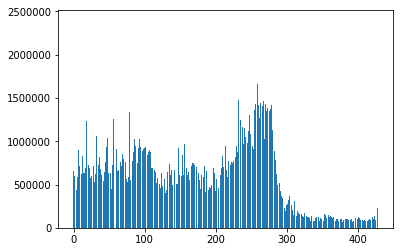

In [6]:
plt.bar(c_weibo['attitudes_count'].index,c_weibo['attitudes_count'])
plt.show()

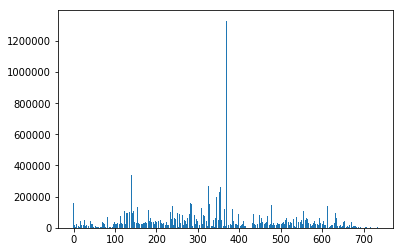

In [7]:
plt.bar(h_weibo['attitudes_count'].index,h_weibo['attitudes_count'])
plt.show()

# 点赞部分分析

In [8]:
len(c_attitude)

2475

In [9]:
len(h_attitude)

2498

In [10]:
c_attitude.head()

,total_number,attitude_id,created_at,source,id,screen_name,profile_image_url,verified,followers_count,mbtype,profile_url,weibo_id
0,581216,4441641614152711,刚刚,OPPO智能手机,6618438638,Desting婷儿,https://tvax1.sinaimg.cn/crop.0.0.664.664.180/...,False,1,0,https://m.weibo.cn/u/6618438638?uid=6618438638,NaN
1,581216,4441641580014663,刚刚,三星android智能手机,5681330112,宛如我心田,https://tvax4.sinaimg.cn/crop.0.0.1544.1544.18...,False,167,0,https://m.weibo.cn/u/5681330112?uid=5681330112,NaN
2,581216,4441641433661926,刚刚,iPhone客户端,7010820743,心悦坤哥kB9654,https://tvax1.sinaimg.cn/crop.2.0.96.96.180/00...,False,1,0,https://m.weibo.cn/u/7010820743?uid=7010820743,NaN
3,581216,4441641433661854,刚刚,荣耀畅玩8C,6335105928,超喜葵葵呐,https://tvax2.sinaimg.cn/crop.0.0.664.664.180/...,False,16,0,https://m.weibo.cn/u/6335105928?uid=6335105928,NaN
4,581216,4441641257768061,1分钟前,iPhone客户端,6520751865,静守己心-雪vivi,https://tvax3.sinaimg.cn/crop.0.0.1080.1080.18...,False,39,0,https://m.weibo.cn/u/6520751865?uid=6520751865,NaN


In [11]:
c_attitude['verified'].value_counts()

False    2319
True      156
Name: verified, dtype: int64

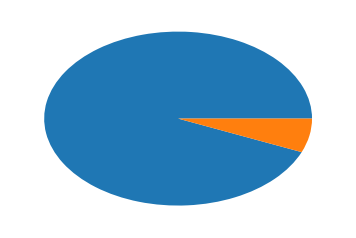

In [12]:
plt.pie(c_attitude['verified'].value_counts())
plt.show()

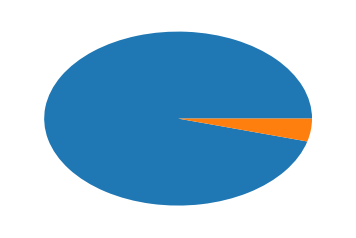

In [13]:
plt.pie(h_attitude['verified'].value_counts())
plt.show()

In [14]:
#点赞者的认证比例区别不大

In [15]:
c_attitude[c_attitude['profile_image_url'].isna()]

,total_number,attitude_id,created_at,source,id,screen_name,profile_image_url,verified,followers_count,mbtype,profile_url,weibo_id


In [16]:
h_attitude[h_attitude['profile_image_url'].isna()]

,total_number,attitude_id,created_at,source,id,screen_name,profile_image_url,verified,followers_count,mbtype,profile_url,weibo_id


In [17]:
#全部有背景图片

In [18]:
c_attitude['mbtype'].value_counts()

0     1430
2      692
11     188
12     159
13       6
Name: mbtype, dtype: int64

In [19]:
h_attitude['mbtype'].value_counts()

0     1609
2      662
11     124
12     100
13       3
Name: mbtype, dtype: int64

In [20]:
#mbtype比例差不多

In [21]:
h_attitude['followers_count'][h_attitude['followers_count']<10].value_counts().sum()

1011

In [22]:
h_attitude['followers_count'][h_attitude['followers_count']>10].value_counts().sum()

1447

In [23]:
c_attitude['followers_count'][c_attitude['followers_count']<10].value_counts().sum()

763

In [24]:
c_attitude['followers_count'][c_attitude['followers_count']>10].value_counts().sum()

1679

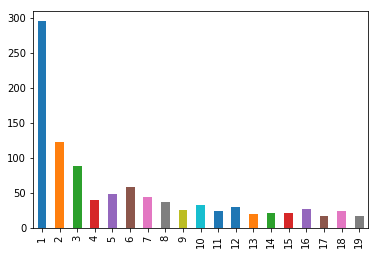

In [25]:
c_attitude['followers_count'][c_attitude['followers_count']<20].value_counts().sort_index().plot(kind='bar')
plt.show()

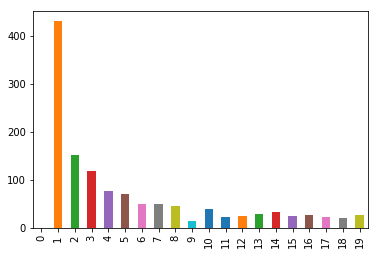

In [26]:
h_attitude['followers_count'][h_attitude['followers_count']<20].value_counts().sort_index().plot(kind='bar')
plt.show()

In [27]:
#点赞者的质量有差距，但是并不大

# 转发部分分析

In [28]:
c_repost.head()

,screen_name,gender,followers_count,follow_count,created_at,source,statuses_count,id,urank,mbrank,...,raw_text,repost_id,pending_approval_count,isLongText,cover_image_phone,avatar_hd,mbtype,verified,profile_url,weibo_id
0,用户6905198034,f,1,0,刚刚,Android平板客户端,282,6905198034,4,0,...,遇见你，是我最美丽的意外,4441638446920643,0,False,https://tva1.sinaimg.cn/crop.0.0.640.640.640/5...,https://ss1.sinaimg.cn/orj480/default_avatar_f...,0,False,https://m.weibo.cn/u/6905198034?uid=6905198034,4441079325631960
1,Lq果同7,f,1,59,刚刚,Android平板客户端,33,7307496752,0,0,...,You cannot burn the candle at both ends.,4441638443407953,0,False,https://tva1.sinaimg.cn/crop.0.0.640.640.640/5...,https://wx4.sinaimg.cn/orj480/007YxvIQly8g7400...,0,False,https://m.weibo.cn/u/7307496752?uid=7307496752,4441079325631960
2,Ae要整2_m,f,13,156,刚刚,Android平板客户端,120,7278179674,4,0,...,He who lives in a glass house should not throw...,4441638308921354,0,False,https://tva1.sinaimg.cn/crop.0.0.640.640.640/5...,https://wx2.sinaimg.cn/orj480/007Wyv0Kly8g5uyi...,0,False,https://m.weibo.cn/u/7278179674?uid=7278179674,4441079325631960
3,反弹73,m,109,256,刚刚,vivo X23全息幻彩,5273,5684189690,14,5,...,好想你好想你[可爱][泪],4441638270689981,0,False,https://tva1.sinaimg.cn/crop.0.0.640.640.640/9...,https://wx2.sinaimg.cn/orj480/006cGhoSly8g8igd...,11,False,https://m.weibo.cn/u/5684189690?uid=5684189690,4441079325631960
4,我就是爱困,f,115,140,1分钟前,前后2000万 OPPO R11s,5433,5664620890,9,1,...,啊啊啊啊啊啊宝贝 想你[泪]我忙的都没时间刷微博🏄了 [泪][泪]@蔡徐坤,4441638191947118,0,False,https://tva1.sinaimg.cn/crop.0.0.640.640.640/9...,https://wx1.sinaimg.cn/orj480/006bmaF4ly8g8u9i...,2,True,https://m.weibo.cn/u/5664620890?uid=5664620890,4441079325631960


In [29]:
# 转发的总长度
print("韩寒",len(h_repost))
print("蔡徐坤",len(c_repost))

韩寒 32585
蔡徐坤 22630


In [30]:
pd.value_counts(h_repost["screen_name"]).sort_values()

3saner              1
峰随璇转                1
小毛驴滴答嘀嗒             1
仙人掌C                1
啊哈哈哈哈哈啊哈哈哈          1
如风ve                1
高鼻梁圈儿-trista        1
管胖儿                 1
豆子航                 1
哄嘛咪嘛呢哄              1
小灯笼-啊灯              1
趙花情商不在线             1
彭雪Yuki酱             1
看时间慢慢爬过你我的皮肤        1
princesssq1011      1
范塔西乔伊斯              1
睡不着的小兰兰             1
焦豆豆又叫少侠终结者焦十三娘      1
等那天_forever         1
blackwidow_man      1
MinneTang           1
逝水年华exister         1
AskForAnswer        1
飞田大树                1
Senses-NT           1
onlyyangming123     1
JasmineRainnn       1
百香果泡芙双响炮            1
你要成为一束光             1
天边小卖部               1
                   ..
Grace海若因            4
称覆舟01               4
Sr就是锶锶锶             4
稀里糊涂的咕噜喵            4
方格小希                4
无知奔忙化作光亮            4
鄢陳kilig             4
即兴的骨头               4
我还是改叫高小达吧           4
安安奶莉童               5
再不疯狂我们就老了大姑娘        5
改革春风吹你旗             5
梵高先生ZORRO           5
嗨呀是陳信宏啊             5
可樂葵x      

In [31]:
pd.value_counts(c_repost["screen_name"]).sort_values()

Fq知多1_mR              1
给你慢条斯理的吻              1
沐坤ikun                1
一口酸奶呀                 1
苏慕辰预祝蔡徐坤0802生日快乐      1
闭月c                   1
啊阿啊小蔡                 1
爱坤哥喏                  1
Ferry_August          1
Honna                 1
ikun16472             1
小熊家的凉平君               1
失了仙味剖                 1
困困的小宝贝                1
辣辣欢欢                  1
小奶坤9In685             1
肿眼泡儿妹妹                1
江湖见23913              1
蔡徐坤的忠实女朋友             1
思忖70904               1
可盐可甜小葵花               1
原创歌手8Jt742            1
小菜包-ikun              1
摸摸菜菜的音乐梦想             1
安暖如夏_cindy            1
家得福发                  1
时光凉_透初时模样的秋天          1
风云浪紀1                 1
骆茅闻鱼蒲                 1
如果遇见你idol             1
                   ... 
毁心人_purple           68
谷立录菁                 70
倒影的世界是怎样的            71
responsible49436     71
一颗太阳花吖               72
你好明天_YangXu__        72
--迷路的小女孩--           73
洛洛_yipiayun          74
我是一个-超级无敌可爱的小仙女      75
卑微嗳_Enzi             76
储蓄卡的女工          

In [32]:
#多次转发的比例明显菜高

In [33]:
c_ser = c_repost.groupby(c_repost["screen_name"],as_index=False).size().sort_values()
h_ser = h_repost.groupby(h_repost["screen_name"],as_index=False).size().sort_values()

In [34]:
print("韩寒的转发量和转发人数：",len(h_ser),len(h_repost))
print("蔡徐坤的转发量和转发人数：",len(c_ser),len(c_repost))
print("韩寒的人均转发量：",len(h_repost)/len(h_ser))
print("蔡徐坤的人均转发量：",len(c_repost)/len(c_ser))
# 转发的用户数量

韩寒的转发量和转发人数： 24854 32585
蔡徐坤的转发量和转发人数： 7423 22630
韩寒的人均转发量： 1.3110565703709665
蔡徐坤的人均转发量： 3.048632628317392


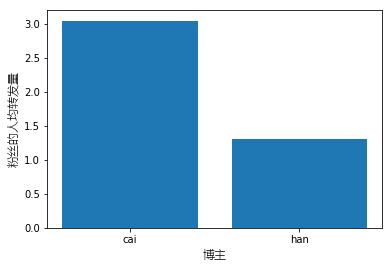

In [35]:
# 人均转发量差距很大
fig, ax = plt.subplots()
x = ["han","cai"]
y = [len(h_repost)/len(h_ser),len(c_repost)/len(c_ser)]
ax.set_xlabel(u'博主',fontproperties=font)
ax.set_ylabel(u'粉丝的人均转发量',fontproperties=font)
ax.bar(x,y)
plt.show()

In [36]:
c_ser = pd.DataFrame({'screen_name':c_ser.index,'repost_times':c_ser.values})
h_ser = pd.DataFrame({'screen_name':h_ser.index,'repost_times':h_ser.values})

In [37]:
# 将发微博的次数作为新的特征
h_repost = h_repost.set_index('screen_name',drop=False).join(h_ser.set_index('screen_name'))
c_repost = c_repost.set_index('screen_name',drop=False).join(c_ser.set_index('screen_name'))

In [38]:
# 序号重编
h_repost = h_repost.reset_index(drop=True)
c_repost = c_repost.reset_index(drop=True)

In [39]:
# 根据screen_name去重，保留第一项
h_r_unique = h_repost.drop_duplicates(subset=['screen_name'],keep='first',inplace=False)
c_r_unique = c_repost.drop_duplicates(subset=['screen_name'],keep='first',inplace=False)

# 性别

In [130]:
h_gender_f = h_r_unique[h_r_unique['gender']=="f"].count()['gender']
h_gender_m = h_r_unique[h_r_unique['gender']=="m"].count()['gender']

In [131]:
print("韩寒转发者的男性数量为：",h_gender_m,"女性数量为：",h_gender_f,"男女比例为：",float(h_gender_m/h_gender_f))

韩寒转发者的男性数量为： 9475 女性数量为： 15379 男女比例为： 0.616099876454906


In [133]:
c_gender_f = c_r_unique[c_r_unique['gender']=="f"].count()['gender']
c_gender_m = c_r_unique[c_r_unique['gender']=="m"].count()['gender']
print("蔡徐坤转发者的男性数量为：",c_gender_m,"女性数量为：",c_gender_f,"男女比例为：",float(c_gender_m/c_gender_f))

蔡徐坤转发者的男性数量为： 1648 女性数量为： 5775 男女比例为： 0.2853679653679654


In [43]:
#男女平均转发量
print("男性平均转发数量：",np.average(h_r_unique['repost_times'][h_r_unique['gender']=='m']))
print("女性平均转发数量：",np.average(h_r_unique['repost_times'][h_r_unique['gender']=='f']))

男性平均转发数量： 1.3013192612137203
女性平均转发数量： 1.317055725339749


In [44]:
#男女平均转发量
print("男性平均转发数量：",np.average(c_r_unique['repost_times'][c_r_unique['gender']=='m']))
print("女性平均转发数量：",np.average(c_r_unique['repost_times'][c_r_unique['gender']=='f']))

男性平均转发数量： 3.179611650485437
女性平均转发数量： 3.0112554112554113


In [45]:
#总体上，男女的平均转发量区别不大

# 粉丝数和关注数

In [46]:
print('韩寒转发者的平均粉丝数为：',np.average(h_r_unique['followers_count']))
print('蔡徐坤转发者的平均粉丝数为：',np.average(c_r_unique['followers_count']))
print('韩寒转发者的最大粉丝数为：',h_r_unique['followers_count'].max())
print('蔡徐坤转发者的最大粉丝数为：',c_r_unique['followers_count'].max())
print('韩寒转发者的粉丝数方差为：',h_r_unique['followers_count'].var())
print('蔡徐坤转发者的粉丝数方差为：',c_r_unique['followers_count'].var())
print('韩寒转发者的粉丝数中值为：',h_r_unique['followers_count'].median())
print('蔡徐坤转发者的粉丝数中值为：',c_r_unique['followers_count'].median())

韩寒转发者的平均粉丝数为： 5430.408867787881
蔡徐坤转发者的平均粉丝数为： 191.06695406170013
韩寒转发者的最大粉丝数为： 45841260
蔡徐坤转发者的最大粉丝数为： 51690
韩寒转发者的粉丝数方差为： 109689033022.48451
蔡徐坤转发者的粉丝数方差为： 1310456.4173704935
韩寒转发者的粉丝数中值为： 215.0
蔡徐坤转发者的粉丝数中值为： 53.0


In [47]:
print('韩寒转发者的平均关注数为：',np.average(h_r_unique['follow_count']))
print('蔡徐坤转发者的平均关注数为：',np.average(c_r_unique['follow_count']))
print('韩寒转发者的最大关注数为：',h_r_unique['follow_count'].max())
print('蔡徐坤转发者的最大关注数为：',c_r_unique['follow_count'].max())
print('韩寒转发者的关注数方差为：',h_r_unique['follow_count'].var())
print('蔡徐坤转发者的关注数方差为：',c_r_unique['follow_count'].var())
print('韩寒转发者的关注数中值为：',h_r_unique['follow_count'].median())
print('蔡徐坤转发者的关注数中值为：',c_r_unique['follow_count'].median())

韩寒转发者的平均关注数为： 460.8359620181862
蔡徐坤转发者的平均关注数为： 201.3732992051731
韩寒转发者的最大关注数为： 12899
蔡徐坤转发者的最大关注数为： 5926
韩寒转发者的关注数方差为： 265870.30669203424
蔡徐坤转发者的关注数方差为： 93640.26119481474
韩寒转发者的关注数中值为： 327.0
蔡徐坤转发者的关注数中值为： 116.0


In [48]:
# 平均粉丝数差距非常大

In [49]:
print('韩寒转发者中粉丝数为0的数量为：',len(h_r_unique[h_r_unique['followers_count']==0]))
print('蔡徐坤转发者中粉丝数为0的数量为：',len(c_r_unique[c_r_unique['followers_count']==0]))
print('韩寒转发者中关注数为0的数量为：',len(h_r_unique[h_r_unique['follow_count']==0]))
print('蔡徐坤转发者中关注数为0的数量为：',len(c_r_unique[c_r_unique['follow_count']==0]))

韩寒转发者中粉丝数为0的数量为： 6
蔡徐坤转发者中粉丝数为0的数量为： 3
韩寒转发者中关注数为0的数量为： 26
蔡徐坤转发者中关注数为0的数量为： 563


In [50]:
#关注数量差距非常大

In [51]:
# 为避免计算有错，将其数量置为1
h_r_unique['followers_count'][h_r_unique['followers_count']==0] = 1
c_r_unique['followers_count'][c_r_unique['followers_count']==0] = 1
h_r_unique['follow_count'][h_r_unique['follow_count']==0] = 1
c_r_unique['follow_count'][c_r_unique['follow_count']==0] = 1

E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_g

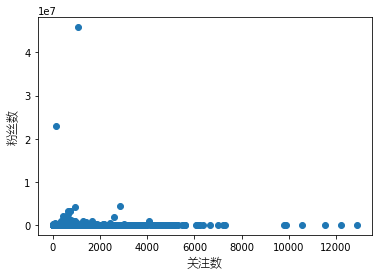

In [52]:
fig, ax = plt.subplots()
x = h_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = h_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

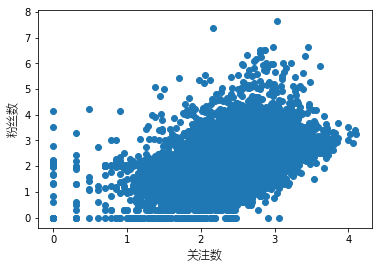

In [53]:
fig, ax = plt.subplots()
x_log10 = np.log10(h_r_unique['follow_count'])
ax.set_xlabel(u'关注数',fontproperties=font)
y_log10 = np.log10(h_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x_log10,y_log10)
plt.show()

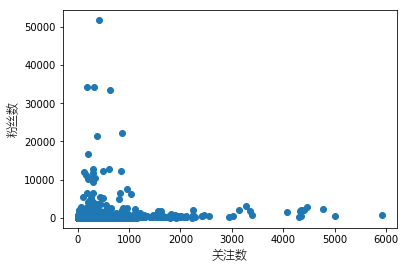

In [54]:
fig, ax = plt.subplots()
x = c_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = c_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

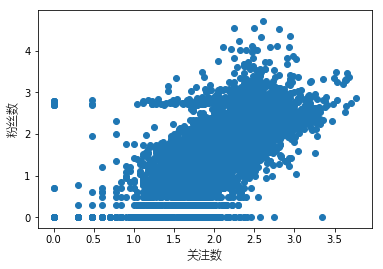

In [55]:
fig, ax = plt.subplots()
x = np.log10(c_r_unique['follow_count'])
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log10(c_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

In [56]:
# 看不出什么区别

In [57]:
# 新建新特征“粉丝关注比”
h_r_unique['fan_pro'] = h_r_unique['followers_count']/h_r_unique['follow_count']
c_r_unique['fan_pro'] = c_r_unique['followers_count']/c_r_unique['follow_count']

E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
h1 = h_r_unique['fan_pro'].sort_values()
h1 = h1.reset_index(drop=True)
c1 = c_r_unique['fan_pro'].sort_values()
c1 = c1.reset_index(drop=True)

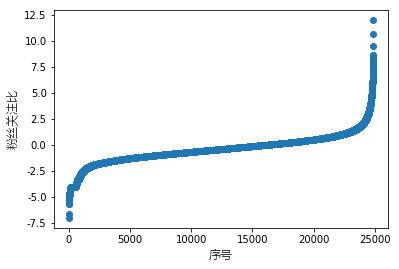

In [59]:
fig, ax = plt.subplots()
x = h1.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(h1.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

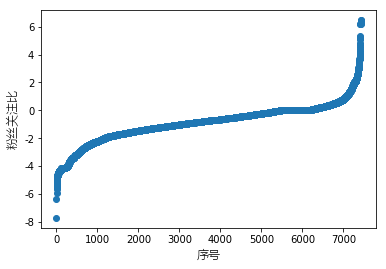

In [60]:
fig, ax = plt.subplots()
x = c1.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(c1.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

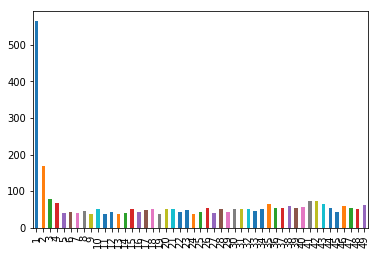

In [61]:
h_r_unique['followers_count'][h_r_unique['followers_count']<50].value_counts().sort_index().plot(kind='bar')
plt.show()

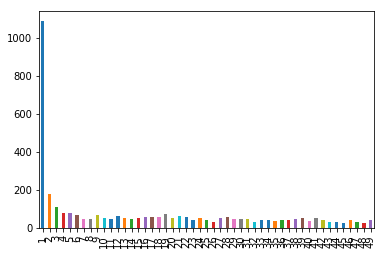

In [62]:
c_r_unique['followers_count'][c_r_unique['followers_count']<50].value_counts().sort_index().plot(kind='bar')
plt.show()

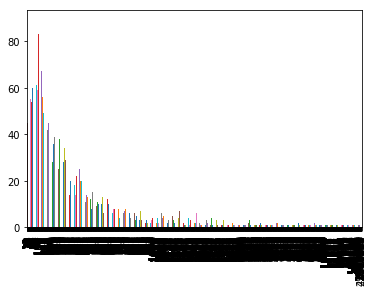

In [63]:
h_r_unique['followers_count'][h_r_unique['followers_count']>10].value_counts().sort_index().plot(kind='bar')
plt.show()

# 创建时间

In [64]:
h_r_unique['created_at'].value_counts().sort_index()

02-05       10663
02-06        3522
02-07        3944
02-08        1417
02-09         736
02-10         548
02-11         433
02-12         333
02-13         256
02-14         191
02-15         229
02-16         133
02-17         157
02-18          82
02-19          87
02-20          95
02-21          54
02-22          61
02-23          68
02-24          48
02-25          53
02-26          53
02-27          53
02-28          21
03-01          26
03-02          23
03-03          28
03-04          20
03-05          25
03-06          22
            ...  
10-24           2
10-25           3
10-27           4
10-28           1
10-29           1
10-30           1
10-31           2
11-01          12
11-02           3
11-03           2
11-04           3
11-05           4
11-06           2
11-07           4
11-08           2
11-09           6
11-10           3
11-11           2
11-12           3
11-13           4
11-14           4
11-15           1
11-16           1
11-17           4
11-18     

In [65]:
c_r_unique['created_at'].value_counts().sort_index()

10分钟前         2
10小时前       298
11分钟前         4
11小时前       351
12小时前       336
13小时前       342
14分钟前         4
14小时前       344
15分钟前         1
15小时前       257
16分钟前         1
16小时前       217
17分钟前         2
17小时前       235
18小时前       279
19分钟前         2
19小时前       225
1分钟前          1
1小时前         79
20分钟前         3
20小时前       223
21分钟前         2
21小时前       221
22分钟前         3
22小时前       231
23分钟前         1
23小时前       203
26分钟前         2
27分钟前         1
28分钟前         1
           ... 
昨天 13:52      7
昨天 13:53      5
昨天 13:54      6
昨天 13:55      5
昨天 13:56      3
昨天 13:57      4
昨天 13:58      2
昨天 13:59      3
昨天 14:00      6
昨天 14:01      6
昨天 14:02      4
昨天 14:03      6
昨天 14:04      6
昨天 14:05      8
昨天 14:06      4
昨天 14:07      2
昨天 14:08      7
昨天 14:09      4
昨天 14:10      6
昨天 14:11      6
昨天 14:12      7
昨天 14:13      8
昨天 14:14      5
昨天 14:15      5
昨天 14:16     10
昨天 14:17      7
昨天 14:18      6
昨天 14:19      5
昨天 14:20      5
昨天 14:21      4
Name: created_at, Length

# 发博数量

In [66]:
print('韩寒转发者的平均发博数为：',np.average(h_r_unique['statuses_count']))
print('蔡徐坤转发者的平均发博数为：',np.average(c_r_unique['statuses_count']))
print('韩寒转发者的最大发博数为：',h_r_unique['statuses_count'].max())
print('蔡徐坤转发者的最大发博数为：',c_r_unique['statuses_count'].max())
print('韩寒转发者的发博数方差为：',h_r_unique['statuses_count'].var())
print('蔡徐坤转发者的发博数方差为：',c_r_unique['statuses_count'].var())
print('韩寒转发者的发博数中值为：',h_r_unique['statuses_count'].median())
print('蔡徐坤转发者的发博数中值为：',c_r_unique['statuses_count'].median())

韩寒转发者的平均发博数为： 3053.8681499959766
蔡徐坤转发者的平均发博数为： 2772.270914724505
韩寒转发者的最大发博数为： 337254
蔡徐坤转发者的最大发博数为： 179692
韩寒转发者的发博数方差为： 58062380.935457945
蔡徐坤转发者的发博数方差为： 29561604.153084368
韩寒转发者的发博数中值为： 1022.0
蔡徐坤转发者的发博数中值为： 945.0


# 发博工具

In [67]:
source = h_r_unique['source'].value_counts()
ser = h_r_unique['repost_times'].groupby(h_r_unique['source']).sum().sort_values(ascending=False)
source ={"source":source.index,"times":source.values}
source = pd.DataFrame(source)
ser = {"source":ser.index,"repost_times":ser.values}
ser = pd.DataFrame(ser)
source = source.set_index('source',drop=False).join(ser.set_index('source'))
source = source.reset_index(drop=True)

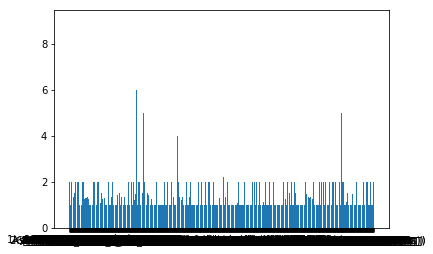

In [68]:
a = list(source['repost_times']/source['times'])
plt.bar(list(source['source']),a)
plt.figure(figsize=(40,20))
plt.show()

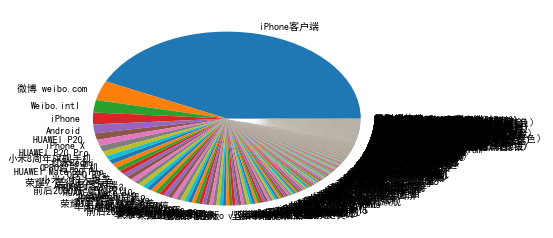

In [69]:
plt.pie(list(source['times']),labels=list(source['source']))
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决‘-’表现为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [70]:
source = c_r_unique['source'].value_counts()
ser = c_r_unique['repost_times'].groupby(c_r_unique['source']).sum().sort_values(ascending=False)
source ={"source":source.index,"times":source.values}
source = pd.DataFrame(source)
ser = {"source":ser.index,"repost_times":ser.values}
ser = pd.DataFrame(ser)
source = source.set_index('source',drop=False).join(ser.set_index('source'))
source = source.reset_index(drop=True)

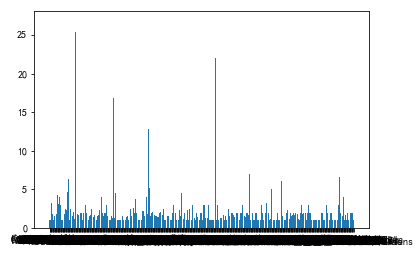

In [71]:
a = list(source['repost_times']/source['times'])
plt.bar(list(source['source']),a)
plt.figure(figsize=(40,20))
plt.show()

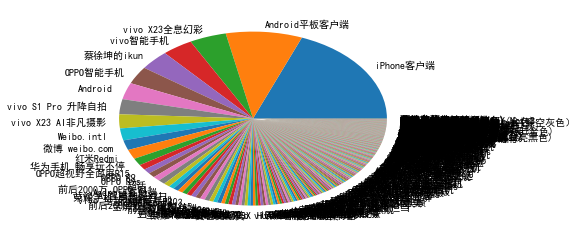

In [72]:
plt.pie(list(source['times']),labels=list(source['source']))
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决‘-’表现为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [73]:
# 转发设备的比例很不同

# 等级urank

In [74]:
print('韩寒转发者的平均等级为：',np.average(h_r_unique['urank']))
print('蔡徐坤转发者的平均等级为：',np.average(c_r_unique['urank']))
print('韩寒转发者的最大等级为：',h_r_unique['urank'].max())
print('蔡徐坤转发者的最大等级为：',c_r_unique['urank'].max())
print('韩寒转发者的等级方差为：',np.var(h_r_unique['urank']))
print('蔡徐坤转发者的等级方差为：',np.var(c_r_unique['urank']))
print('韩寒转发者的等级中值为：',h_r_unique['urank'].median())
print('蔡徐坤转发者的等级中值为：',c_r_unique['urank'].median())

韩寒转发者的平均等级为： 23.83572060835278
蔡徐坤转发者的平均等级为： 10.305536844941399
韩寒转发者的最大等级为： 48
蔡徐坤转发者的最大等级为： 48
韩寒转发者的等级方差为： 184.86538373074154
蔡徐坤转发者的等级方差为： 82.40132593771752
韩寒转发者的等级中值为： 27.0
蔡徐坤转发者的等级中值为： 9.0


In [75]:
# 很明显，转发者的等级差距明显

# 描述

In [76]:
#description为空的比例
print("韩寒转发者的描述为空的比例",len(h_r_unique[h_r_unique['description'] != h_r_unique['description']])/len(h_r_unique['description']))
print("蔡徐坤转发者的描述为空的比例",len(c_r_unique[c_r_unique['description'] != c_r_unique['description']])/len(c_r_unique['description']))

韩寒转发者的描述为空的比例 0.22298221614227087
蔡徐坤转发者的描述为空的比例 0.4649063720867574


In [77]:
# 很明显，转发者是否有描述的比例差距明显

# 勋章数badge

In [78]:
print('韩寒转发者的平均勋章数为：',np.average(h_r_unique['badge']))
print('蔡徐坤转发者的平均勋章数为：',np.average(c_r_unique['badge']))
print('韩寒转发者的最大勋章数为：',h_r_unique['badge'].max())
print('蔡徐坤转发者的最大勋章数为：',c_r_unique['badge'].max())
print('韩寒转发者的勋章数方差为：',np.var(h_r_unique['badge']))
print('蔡徐坤转发者的勋章数方差为：',np.var(c_r_unique['badge']))
print('韩寒转发者的勋章数中值为：',h_r_unique['badge'].median())
print('蔡徐坤转发者的勋章数中值为：',c_r_unique['badge'].median())

韩寒转发者的平均勋章数为： 8.81568359217832
蔡徐坤转发者的平均勋章数为： 9.220800215546275
韩寒转发者的最大勋章数为： 45
蔡徐坤转发者的最大勋章数为： 35
韩寒转发者的勋章数方差为： 27.845765129789406
蔡徐坤转发者的勋章数方差为： 37.049051387137126
韩寒转发者的勋章数中值为： 8.0
蔡徐坤转发者的勋章数中值为： 9.0


# 转发者的转发数、评论数、点赞数

In [79]:
print("韩寒转发数为0的比例",len(h_r_unique[h_r_unique['reposts_count']==0])/len(h_r_unique))
print("蔡徐坤转发数为0的比例",len(c_r_unique[c_r_unique['reposts_count']==0])/len(c_r_unique))

韩寒转发数为0的比例 0.9852740001609399
蔡徐坤转发数为0的比例 0.9929947460595446


In [80]:
print("韩寒评论数为0的比例",len(h_r_unique[h_r_unique['comments_count']==0])/len(h_r_unique))
print("蔡徐坤评论数为0的比例",len(c_r_unique[c_r_unique['comments_count']==0])/len(c_r_unique))

韩寒评论数为0的比例 0.9613341916794077
蔡徐坤评论数为0的比例 0.9971709551394315


In [81]:
print("韩寒点赞数为0的比例",len(h_r_unique[h_r_unique['attitudes_count']==0])/len(h_r_unique))
print("蔡徐坤点赞数为0的比例",len(c_r_unique[c_r_unique['attitudes_count']==0])/len(c_r_unique))

韩寒点赞数为0的比例 0.877605214452402
蔡徐坤点赞数为0的比例 0.9835645965243163


In [82]:
# 很明显，转发者转发的质量明显差距

# isLongText

In [83]:
#isLongText为空的比例
print("韩寒转发者的描述为空的比例",len(h_r_unique[h_r_unique['isLongText'] == True])/len(h_r_unique['isLongText']))
print("蔡徐坤转发者的描述为空的比例",len(c_r_unique[c_r_unique['isLongText'] == True])/len(c_r_unique['isLongText']))

韩寒转发者的描述为空的比例 0.0
蔡徐坤转发者的描述为空的比例 0.0


In [84]:
h_r_unique['isLongText'].value_counts()

False    24854
Name: isLongText, dtype: int64

In [85]:
c_r_unique['isLongText'].value_counts()

False    7423
Name: isLongText, dtype: int64

In [86]:
#都是false，没有什么用

# cover_image_phone/avatar_hd

In [87]:
h_r_unique['cover_image_phone'].value_counts()

https://tva1.sinaimg.cn/crop.0.0.640.640.640/549d0121tw1egm1kjly3jj20hs0hsq4f.jpg    12417
https://tva1.sinaimg.cn/crop.0.0.640.640.640/9d44112bjw1f1xl1c10tuj20hs0hs0tw.jpg     2286
https://tva2.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecasunmkncj20hs0hsq4j.jpg      827
https://tva2.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecat8op0e1j20hs0hswgu.jpg      556
https://tva4.sinaimg.cn/crop.0.0.640.640.640/6ce2240djw1e8iktk4ohij20hs0hsmz6.jpg      537
https://tva4.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecat3p2p2qj20hs0hsmz4.jpg      526
https://tva3.sinaimg.cn/crop.0.0.640.640/6ce2240djw1e9uwsjwemzj20hs0hs41z.jpg          430
https://tva1.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecat4uqw77j20hs0hsacp.jpg      357
https://tva1.sinaimg.cn/crop.0.0.640.640.640/6cf8d7ebjw1ehfr4xa8psj20hs0hsgpg.jpg      318
https://tva3.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1eca1ktsx9tj20hs0hsjtk.jpg      229
https://tva4.sinaimg.cn/crop.0.0.640.640/6cf8d7ebjw1ehfr60whp7j20hs0hsacf.jpg          229

In [88]:
c_r_unique['cover_image_phone'].value_counts()

https://tva1.sinaimg.cn/crop.0.0.640.640.640/549d0121tw1egm1kjly3jj20hs0hsq4f.jpg    4655
https://tva1.sinaimg.cn/crop.0.0.640.640.640/9d44112bjw1f1xl1c10tuj20hs0hs0tw.jpg    1311
https://wx1.sinaimg.cn/crop.0.0.640.640.640/0077YBNZly1fxfu443rwfj30hs0hsgmd.jpg      207
https://tva3.sinaimg.cn/crop.0.0.640.640/6ce2240djw1e9uwsjwemzj20hs0hs41z.jpg          91
https://wx4.sinaimg.cn/crop.0.0.640.640.640/0070JLSwly1g552v0682gj30yi0yi787.jpg       69
https://wx2.sinaimg.cn/crop.0.0.640.640.640/69e273f8ly1fsgnkavnd5j20v90v9gmf.jpg       56
https://wx3.sinaimg.cn/crop.0.0.640.640.640/69e273f8ly1g37ak620syj20v90v9n0w.jpg       32
https://tva2.sinaimg.cn/crop.0.0.640.640/68f96449jw1ergqx79rw4j20hs0hswh0.jpg          31
https://tva2.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecasunmkncj20hs0hsq4j.jpg      28
https://wx4.sinaimg.cn/crop.0.0.640.640.640/69e273f8ly1g552llewkfj20e80e8wf8.jpg       21
https://tva2.sinaimg.cn/crop.0.0.640.640.640/a1d3feabjw1ecatccqmkbj20hs0hsmzb.jpg      20
https://tv

In [89]:
h_r_unique[h_r_unique['avatar_hd']!=h_r_unique['avatar_hd']]

,screen_name,gender,followers_count,follow_count,created_at,source,statuses_count,id,urank,mbrank,...,pending_approval_count,isLongText,cover_image_phone,avatar_hd,mbtype,verified,profile_url,weibo_id,repost_times,fan_pro


In [90]:
c_r_unique[c_r_unique['cover_image_phone']!=c_r_unique['cover_image_phone']]

,screen_name,gender,followers_count,follow_count,created_at,source,statuses_count,id,urank,mbrank,...,pending_approval_count,isLongText,cover_image_phone,avatar_hd,mbtype,verified,profile_url,weibo_id,repost_times,fan_pro


In [91]:
#都存在背景图片和头像图片

# mbtype

In [92]:
h_r_unique['mbtype'].value_counts()

0     15460
2      5625
12     2411
11     1251
13      106
14        1
Name: mbtype, dtype: int64

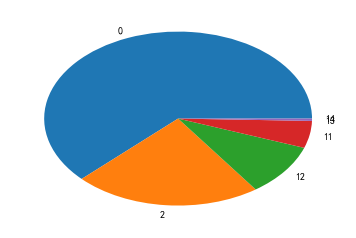

In [93]:
plt.pie(h_r_unique['mbtype'].value_counts().values,labels=h_r_unique['mbtype'].value_counts().index)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决‘-’表现为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [94]:
c_r_unique['mbtype'].value_counts()

0     3374
2     2868
11     627
12     530
13      24
Name: mbtype, dtype: int64

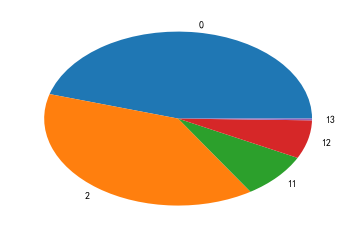

In [95]:
plt.pie(c_r_unique['mbtype'].value_counts().values,labels=c_r_unique['mbtype'].value_counts().index)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决‘-’表现为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [96]:
#0和2的比例有差距

# verified

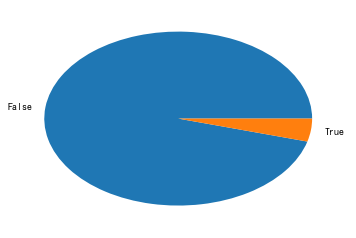

In [97]:
plt.pie(h_r_unique['verified'].value_counts().values,labels=h_r_unique['verified'].value_counts().index)
plt.show()

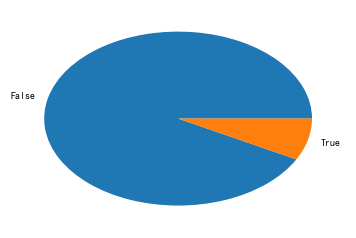

In [98]:
plt.pie(c_r_unique['verified'].value_counts().values,labels=c_r_unique['verified'].value_counts().index)
plt.show()

In [99]:
#是否认证的比例略有差距

# 文档内容分析

In [100]:
c_r_unique['raw_text'].value_counts().sort_values(ascending=False)

转发微博                                                                                                            2331
想你                                                                                                                95
[心]                                                                                                               45
爱你                                                                                                                41
轉發微博                                                                                                              35
//@蔡徐坤粉丝团官微:#蔡徐坤[超话]# [心]#蔡徐坤新歌重生#  收收收！我收！[心][心][心]@蔡徐坤                                                          30
//@Origin_Kun数据站:#蔡徐坤[超话]# [憧憬]#蔡徐坤新歌重生#    都5.0了！期待18宫格[羞嗒嗒]@蔡徐坤 #重生-蔡徐坤[音乐]#                                    29
//@IKUN一片红叶://@狮子与猫的约定:宝贝注意休息，不要熬夜[兔子]//@蔡徐坤网宣组:#蔡徐坤[超话]#丨#蔡徐坤新歌重生# 来自坤哥的明信片5.0[羞嗒嗒]天气变冷，要照顾好自己哦，小猫咪们等你归来[心]      28
宝贝                                                              

In [101]:
len(c_r_unique[c_r_unique['raw_text'].str.contains('#')])

806

In [102]:
c_repost['raw_text'].value_counts().sort_values(ascending=False)

转发微博                                                                                                            3875
//@So小公举 :#蔡徐坤新歌重生# 收到啦 认真的哥哥最帅 @蔡徐坤                                                                             185
蔡徐坤//@So小公举 :#蔡徐坤新歌重生# 收到啦 认真的哥哥最帅 @蔡徐坤                                                                          168
想你                                                                                                               148
//@莫离kkkk:#蔡徐坤新歌重生# 我可以！！！                                                                                       127
//@我是8020:#蔡徐坤新歌重生# All for Music All for KUN[害羞]                                                                124
//@IKUN一片红叶:#蔡徐坤[超话]#丨#蔡徐坤新歌重生# 来自坤哥的明信片5.0[羞嗒嗒]天气变冷，要照顾好自己哦，小猫咪们等你归来[心]                                         120
[心]//@我是8020:#蔡徐坤新歌重生# All for Music All for KUN[害羞]                                                             120
[心]//@哈喽蔡蔡小朋友:好想你啊宝贝                                            

In [103]:
len(h_repost[h_repost['raw_text'].str.contains('#')])/len(h_repost)

0.16562835660580022

In [104]:
len(c_repost[c_repost['raw_text'].str.contains('#')])/len(c_repost)

0.34595669465311535

In [105]:
# 带话题的比例有差距

In [106]:
len(h_repost[h_repost['raw_text'].str.contains('@')])/len(h_repost)

0.22117538744821236

In [107]:
len(c_repost[c_repost['raw_text'].str.contains('@')])/len(c_repost)

0.4781263809102961

In [108]:
# @人的比例有差距

# 根据转发次数分类

In [138]:
h1_r_unique = h_r_unique[h_r_unique['repost_times']==1]
h2_r_unique = h_r_unique[h_r_unique['repost_times']>1]

In [189]:
c1_r_unique = c_r_unique[c_r_unique['repost_times']==1]
c2_r_unique = c_r_unique[c_r_unique['repost_times']>1]
c3_r_unique = c_r_unique[c_r_unique['repost_times']>2]

In [190]:
print("韩寒转发次数等于1次的人数：",len(h1_r_unique))
print("韩寒转发次数大于1次的人数：",len(h2_r_unique))
print("蔡徐坤转发次数等于1次的人数：",len(c1_r_unique))
print("蔡徐坤转发次数大于1次的人数：",len(c2_r_unique))
print("蔡徐坤转发次数大于5次的人数：",len(c3_r_unique))

韩寒转发次数等于1次的人数： 17536
韩寒转发次数大于1次的人数： 7318
蔡徐坤转发次数等于1次的人数： 3950
蔡徐坤转发次数大于1次的人数： 3473
蔡徐坤转发次数大于5次的人数： 1634


# 性别

In [141]:
h1_gender_f = h1_r_unique[h1_r_unique['gender']=="f"].count()['gender']
h1_gender_m = h1_r_unique[h1_r_unique['gender']=="m"].count()['gender']
h2_gender_f = h2_r_unique[h2_r_unique['gender']=="f"].count()['gender']
h2_gender_m = h2_r_unique[h2_r_unique['gender']=="m"].count()['gender']

In [143]:
print("韩寒1转发者的男性数量为：",h1_gender_m,"女性数量为：",h1_gender_f,"男女比例为：",float(h1_gender_m/h1_gender_f))
print("韩寒2转发者的男性数量为：",h2_gender_m,"女性数量为：",h2_gender_f,"男女比例为：",float(h2_gender_m/h2_gender_f))

韩寒1转发者的男性数量为： 6738 女性数量为： 10798 男女比例为： 0.6240044452676422
韩寒2转发者的男性数量为： 2737 女性数量为： 4581 男女比例为： 0.5974678017900021


In [191]:
c1_gender_f = c1_r_unique[c1_r_unique['gender']=="f"].count()['gender']
c1_gender_m = c1_r_unique[c1_r_unique['gender']=="m"].count()['gender']
c2_gender_f = c2_r_unique[c2_r_unique['gender']=="f"].count()['gender']
c2_gender_m = c2_r_unique[c2_r_unique['gender']=="m"].count()['gender']
c3_gender_f = c3_r_unique[c3_r_unique['gender']=="f"].count()['gender']
c3_gender_m = c3_r_unique[c3_r_unique['gender']=="m"].count()['gender']

In [192]:
print("蔡徐坤1转发者的男性数量为：",c1_gender_m,"女性数量为：",c1_gender_f,"男女比例为：",float(c1_gender_m/c1_gender_f))
print("蔡徐坤2转发者的男性数量为：",c2_gender_m,"女性数量为：",c2_gender_f,"男女比例为：",float(c2_gender_m/c2_gender_f))
print("蔡徐坤3转发者的男性数量为：",c3_gender_m,"女性数量为：",c3_gender_f,"男女比例为：",float(c3_gender_m/c3_gender_f))

蔡徐坤1转发者的男性数量为： 742 女性数量为： 3208 男女比例为： 0.23129675810473815
蔡徐坤2转发者的男性数量为： 906 女性数量为： 2567 男女比例为： 0.35294117647058826
蔡徐坤3转发者的男性数量为： 487 女性数量为： 1147 男女比例为： 0.4245858761987794


In [193]:
# 很明显，蔡徐坤的转发者男女比例随着转发数量的增加导致变化

# 粉丝数和关注数

In [194]:
print('韩寒1转发者的平均粉丝数为：',np.average(h1_r_unique['followers_count']))
print('韩寒2转发者的平均粉丝数为：',np.average(h2_r_unique['followers_count']))
print('蔡徐坤1转发者的平均粉丝数为：',np.average(c1_r_unique['followers_count']))
print('蔡徐坤2转发者的平均粉丝数为：',np.average(c2_r_unique['followers_count']))
print('蔡徐坤3转发者的平均粉丝数为：',np.average(c3_r_unique['followers_count']))
print('韩寒1转发者的最大粉丝数为：',h1_r_unique['followers_count'].max())
print('韩寒2转发者的最大粉丝数为：',h2_r_unique['followers_count'].max())
print('蔡徐坤1转发者的最大粉丝数为：',c1_r_unique['followers_count'].max())
print('蔡徐坤2转发者的最大粉丝数为：',c2_r_unique['followers_count'].max())
print('蔡徐坤3转发者的最大粉丝数为：',c3_r_unique['followers_count'].max())
print('韩寒1转发者的粉丝数方差为：',h1_r_unique['followers_count'].var())
print('韩寒2转发者的粉丝数方差为：',h2_r_unique['followers_count'].var())
print('蔡徐坤1转发者的粉丝数方差为：',c1_r_unique['followers_count'].var())
print('蔡徐坤2转发者的粉丝数方差为：',c2_r_unique['followers_count'].var())
print('蔡徐坤3转发者的粉丝数方差为：',c3_r_unique['followers_count'].var())
print('韩寒1转发者的粉丝数中值为：',h1_r_unique['followers_count'].median())
print('韩寒2转发者的粉丝数中值为：',h2_r_unique['followers_count'].median())
print('蔡徐坤1转发者的粉丝数中值为：',c1_r_unique['followers_count'].median())
print('蔡徐坤2转发者的粉丝数中值为：',c2_r_unique['followers_count'].median())
print('蔡徐坤3转发者的粉丝数中值为：',c3_r_unique['followers_count'].median())

韩寒1转发者的平均粉丝数为： 2133.3434078467153
韩寒2转发者的平均粉丝数为： 13331.112052473354
蔡徐坤1转发者的平均粉丝数为： 192.96582278481011
蔡徐坤2转发者的平均粉丝数为： 188.90814857471926
蔡徐坤3转发者的平均粉丝数为： 217.14626682986537
韩寒1转发者的最大粉丝数为： 3314269
韩寒2转发者的最大粉丝数为： 45841260
蔡徐坤1转发者的最大粉丝数为： 51690
蔡徐坤2转发者的最大粉丝数为： 33545
蔡徐坤3转发者的最大粉丝数为： 33545
韩寒1转发者的粉丝数方差为： 1869625394.6144464
韩寒2转发者的粉丝数方差为： 368001944937.10223
蔡徐坤1转发者的粉丝数方差为： 1671988.3272692086
蔡徐坤2转发者的粉丝数方差为： 899623.8633926824
蔡徐坤3转发者的粉丝数方差为： 1479847.6962904094
韩寒1转发者的粉丝数中值为： 212.0
韩寒2转发者的粉丝数中值为： 222.0
蔡徐坤1转发者的粉丝数中值为： 53.0
蔡徐坤2转发者的粉丝数中值为： 52.0
蔡徐坤3转发者的粉丝数中值为： 50.0


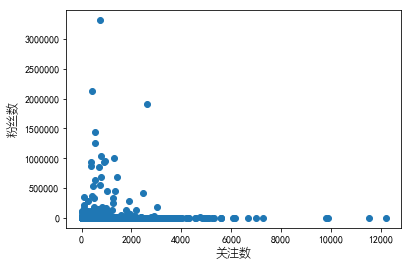

In [151]:
fig, ax = plt.subplots()
x = h1_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = h1_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

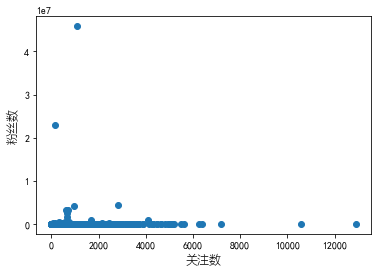

In [156]:
fig, ax = plt.subplots()
x = h2_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = h2_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

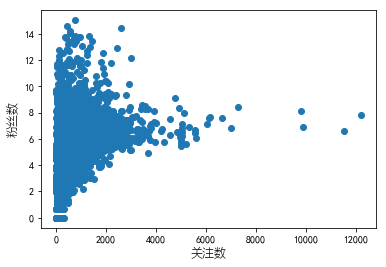

In [157]:
fig, ax = plt.subplots()
x = h1_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log(h1_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

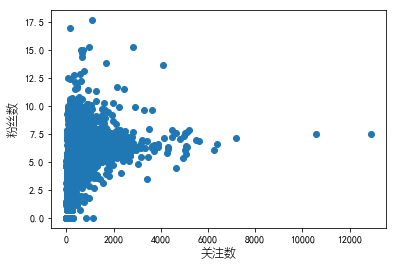

In [158]:
fig, ax = plt.subplots()
x = h2_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log(h2_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

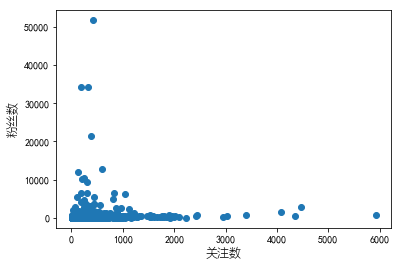

In [160]:
fig, ax = plt.subplots()
x = c1_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = c1_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

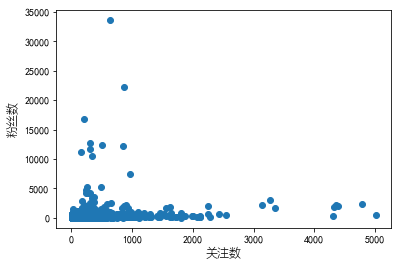

In [161]:
fig, ax = plt.subplots()
x = c2_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = c2_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

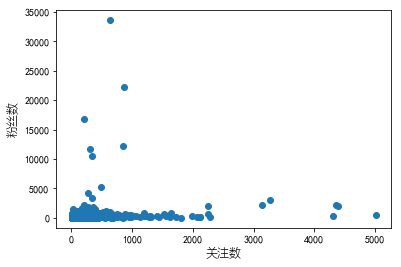

In [195]:
fig, ax = plt.subplots()
x = c3_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = c3_r_unique['followers_count']
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

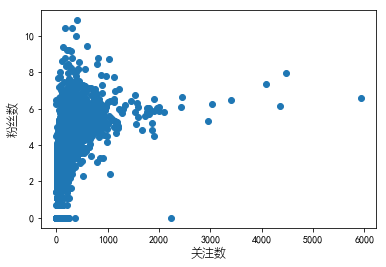

In [162]:
fig, ax = plt.subplots()
x = c1_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log(c1_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

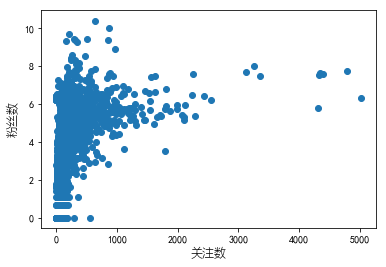

In [163]:
fig, ax = plt.subplots()
x = c2_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log(c2_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

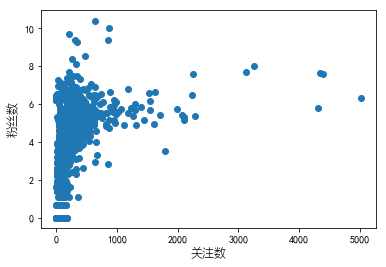

In [196]:
fig, ax = plt.subplots()
x = c3_r_unique['follow_count']
ax.set_xlabel(u'关注数',fontproperties=font)
y = np.log(c3_r_unique['followers_count'])
ax.set_ylabel(u'粉丝数',fontproperties=font)
ax.scatter(x,y)
plt.show()

In [197]:
h1_f = h1_r_unique['fan_pro'].sort_values()
h1_f = h1_f.reset_index(drop=True)
c1_f = c1_r_unique['fan_pro'].sort_values()
c1_f = c1_f.reset_index(drop=True)
h2_f = h2_r_unique['fan_pro'].sort_values()
h2_f = h2_f.reset_index(drop=True)
c2_f = c2_r_unique['fan_pro'].sort_values()
c2_f = c2_f.reset_index(drop=True)
c3_f = c3_r_unique['fan_pro'].sort_values()
c3_f = c3_f.reset_index(drop=True)

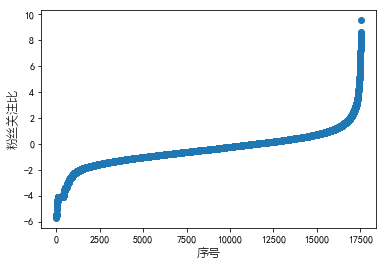

In [165]:
fig, ax = plt.subplots()
x = h1_f.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(h1_f.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

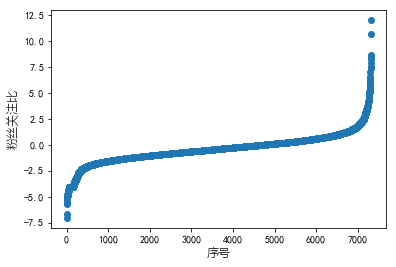

In [166]:
fig, ax = plt.subplots()
x = h2_f.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(h2_f.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

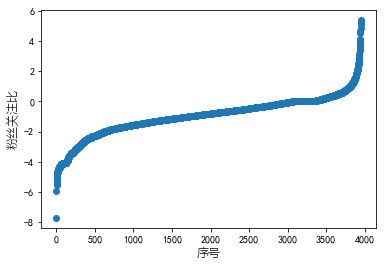

In [167]:
fig, ax = plt.subplots()
x = c1_f.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(c1_f.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

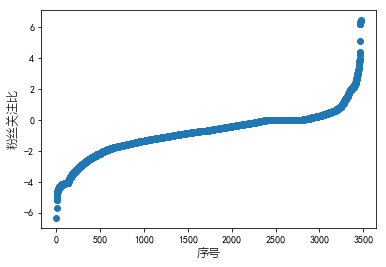

In [168]:
fig, ax = plt.subplots()
x = c2_f.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(c2_f.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

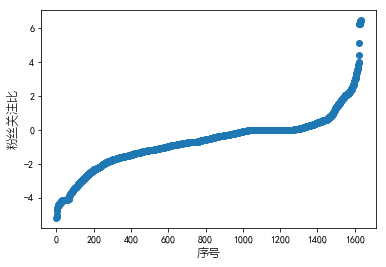

In [198]:
fig, ax = plt.subplots()
x = c3_f.index
ax.set_xlabel(u'序号',fontproperties=font)
y = np.log(c3_f.values)
ax.set_ylabel(u'粉丝关注比',fontproperties=font)
ax.scatter(x,y)
plt.show()

# 发博数、等级urank、勋章数badge

In [181]:
h1_r_unique[['statuses_count','urank','badge']].describe()

,statuses_count,urank,badge
count,17536.000000,17536.000000,17536.000000
mean,2907.834113,23.598141,8.667256
std,7258.479478,13.537345,5.174147
min,0.000000,0.000000,0.000000
25%,314.000000,9.000000,5.000000
50%,982.000000,27.000000,8.000000
75%,2840.250000,35.000000,11.000000
max,337254.000000,48.000000,42.000000


In [182]:
h2_r_unique[['statuses_count','urank','badge']].describe()

,statuses_count,urank,badge
count,7318.000000,7318.000000,7318.000000
mean,3403.807051,24.405029,9.171358
std,8413.217524,13.722406,5.499800
min,1.000000,0.000000,0.000000
25%,374.000000,9.000000,5.000000
50%,1134.000000,28.000000,8.000000
75%,3277.750000,36.000000,12.000000
max,303310.000000,48.000000,45.000000


In [183]:
c1_r_unique[['statuses_count','urank','badge']].describe()

,statuses_count,urank,badge
count,3950.000000,3950.000000,3950.000000
mean,2579.955949,10.701013,9.722532
std,4627.584782,9.183119,5.986223
min,0.000000,0.000000,0.000000
25%,234.000000,4.000000,5.000000
50%,937.000000,9.000000,10.000000
75%,2978.750000,14.000000,14.000000
max,81435.000000,48.000000,35.000000


In [184]:
c2_r_unique[['statuses_count','urank','badge']].describe()

,statuses_count,urank,badge
count,3473.000000,3473.000000,3473.000000
mean,2990.999424,9.855744,8.650158
std,6224.671192,8.937293,6.151363
min,0.000000,0.000000,0.000000
25%,209.000000,4.000000,3.000000
50%,956.000000,9.000000,8.000000
75%,3333.000000,14.000000,13.000000
max,179692.000000,48.000000,28.000000


In [199]:
c3_r_unique[['statuses_count','urank','badge']].describe()

,statuses_count,urank,badge
count,1634.000000,1634.000000,1634.000000
mean,3122.315789,9.167075,7.698898
std,5907.851447,8.621787,5.996726
min,0.000000,0.000000,1.000000
25%,206.000000,4.000000,2.000000
50%,1039.500000,9.000000,7.000000
75%,3660.250000,14.000000,12.000000
max,96629.000000,48.000000,26.000000


In [200]:
#平均数据下降